# Estudo 8 - Visualização de distribuições conjuntas

**Visualizações de distribuições conjuntas permitem analisar dados multivariados (conjunto de dados com multiplas variáveis) de forma a identificar padrões mais facilmente** 

## Distribuições Bivariadas

**Distribuição conjunta de duas variáveis. Ela pode ser visualizada na combinação entre histogramas e gráficos de dispersão**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

**Para estudar distribuições conjuntas, vamos importar um gráfico interno do seaborn com conjunto de dados reais botânicos, contendo medidas de três espécies de flores íris.**

In [2]:
df_iris = sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


cinco atributos - comprimento da sépala (parte constituinte da flor), largura da sépala, comprimento da pétala, largura da pétala, em centímetros e a espécie.

Esses dados foram coletados pelo estatístico Ronald Fisher. O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris: Iris setosa, Iris virginica e Iris versicolor. A ideia desse conjunto de dados é, a partir das medidas das pétalas e das sépalas, distinguir a espécie de flor Iris. Agora, para começar a nossa análise, vamos comparar as distribuições de duas variáveis: o comprimento da sépala e o comprimento da pétala.



### Analisando o comprimento da sépala e o comprimento da pétala

Usamos o `sns.jointplot()` para gerar um gráfico de distribuição conjunta, isso, um gráfico que permite analisar mais de uma distribuição para mais de uma variável de forma individual e conjunta.

Nesse gráfico temos um gráfico de dispersão que permite comparar a distribuição entre duas variáveis e temos o gráfico histograma para cada variável, o que permite analisar individualmente cada variável.

Um detalhe importante sobre a função jointplot() é que ela é baseada na classe do seaborn JointGrid, que controla a grade de visualizações do histograma com o gráfico de densidade e o gráfico de dispersão. Por isso, não é possível configurar o visual dessa função utilizando funções do matplotlib.pyplot, como é possível com outras funções do seaborn.



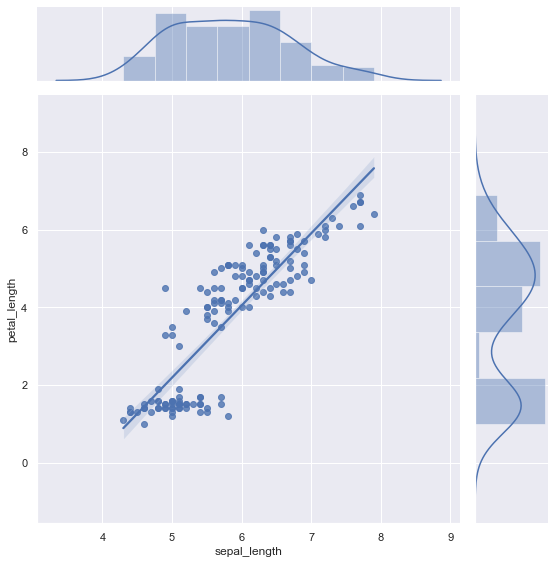

In [15]:
sns.jointplot(x='sepal_length', y='petal_length', kind='reg', height=8, data= df_iris)
plt.show()

Utilizar a função joinplot() é simples, bastando passar os valores que serão mapeados no eixo x e os valores que serão mapeados no eixo y, assim como se faria para criar um gráfico de dispersão com a função scatterplot()

**Análise**

Analise o resultado da função. No topo observa-se um histograma e gráfico de densidade da distribuição marginal dos comprimentos das sépalas e na lateral à direita, há a distribuição marginal do comprimento das pétalas. Em uma única visualização, pode-se perceber que existe uma forte correlação entre os comprimentos da pétala e da sépala, e que a distribuição dos comprimentos das pétalas possuem dois “picos”, no linguajar estatísticos chamados modas, sendo portanto uma distribuição bimodal. Esse tipo de gráfico é útil por poupar tempo e mostrar bastante informação de forma clara.

### Variação do gráfico `joinplot()` 

**Gráfico hexbin**

Uma das variações é o gráfico de hexbin, que é análogo ao histograma para duas dimensões. Nessa variação, ao invés de representar a distribuição conjunta por pontos, o plano cartesiano é dividido em “bins” hexagonais de dimensões iguais. A quantidade de dados dentro de um determinado bin é mapeada para uma escala de cor. Ou seja, quanto mais escuro o bin, mais dados há nele, formando um tipo de gráfico de densidade. Para criar um gráfico de hexbin, basta passar o valor ‘hex’ para o parâmetro kind. Confira:



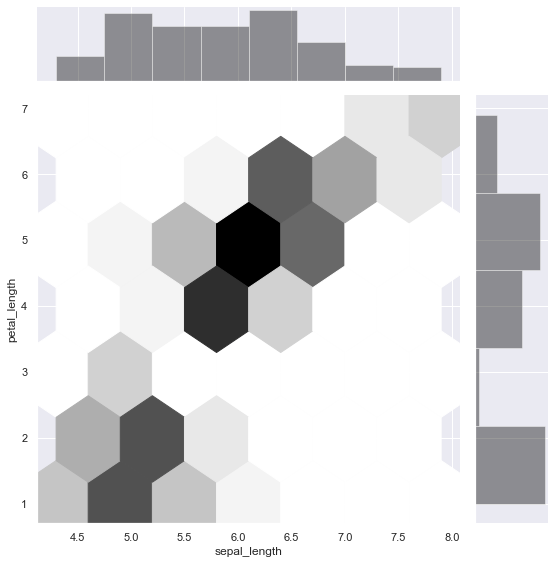

In [18]:
sns.jointplot(x='sepal_length', y='petal_length', kind='hex', height=8, color='black', data=df_iris)

Note que foi passado o valor ‘black’ para o parâmetro color, indicando que será utilizada uma escala de tons de cinza, onde quanto mais próximo do branco há menos dados, e quanto mais próximo do preto há mais dados.

Em relação ao gráfico de dispersão com reta de regressão, o gráfico de hexbin foca menos na correlação entre as duas variáveis e mais na distribuição espacial entre elas, chamando atenção para as regiões onde os dados são mais frequentes.

**Gráfico kde**

Uma outra variação é o gráfico de densidade, onde são estimadas a probabilidade de haver elementos em uma dada região do gráfico. A principal diferença deste gráfico para o de hexbin é que a distribuição conjunta é representada por contornos que possuem uma continuidade, enquanto as marginais são representadas por curvas de probabilidade. Essas curvas de probabilidade são estimadas através de um método conhecido como Estimativa de Densidade de Kernel (em inglês, a sigla KDE é utilizada). Para utilizar esse tipo de gráfico, basta passar o valor ‘kde’ para o parâmetro kind. Confira:



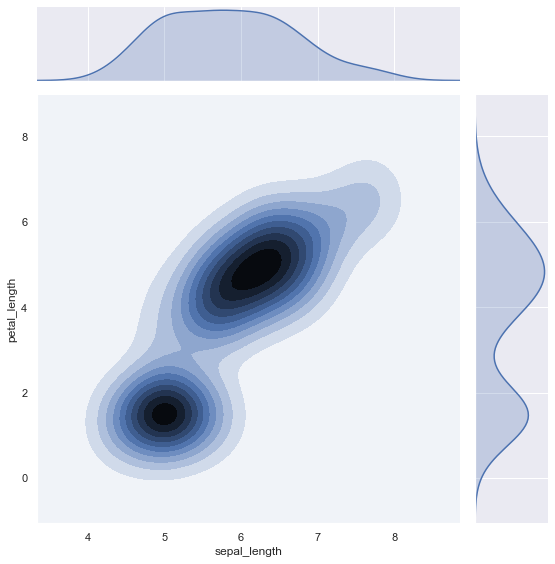

In [19]:
sns.jointplot(x='sepal_length', y='petal_length', kind='kde', height=8, data=df_iris)

Assim como o gráfico de hexbin, o gráfico de densidade foca na distribuição espacial dos dados. Porém, ele representa essa distribuição na forma de probabilidades, onde as áreas mais escuras possuem maior probabilidade de conter dados e as mais claras possuem menos. Comparando, é a diferença entre um histograma e uma curva de densidade de probabilidade para uma distribuição univariada. O gráfico de densidade mostra a distribuição conjunta de forma mais suave e pode ser mais indicado quando o conjunto de dados é muito grande, ajudando a identificar padrões espaciais. Mas é importante lembrar que ele é uma estimativa criada a partir dos dados. Já o gráfico de hexbin mostra a distribuição real dos dados, mas a sua precisão, assim como no histograma, depende da escolha do tamanho dos bins.

**Análise do uso desses gráficos**

Para comparar distribuições de uma variável em relação a um ou mais atributos categóricos, os gráficos de caixa e violino são muito úteis. Porém utilizar esses gráficos para comparar diretamente duas ou mais variáveis quantitativas distintas pode não ser indicado, pois é comum que as variáveis estejam em escalas diferentes e a comparação pode não fazer sentido. Nesses casos, é preferível gráficos de distribuição conjunta, como o exemplo apresentado anteriormente.





##  Distribuições conjuntas par a par


Gráficos de distribuição conjunta são muito úteis para analisar a distribuição entre duas variáveis. Porém, é comum que conjuntos de dados possuam muitas variáveis quantitativas. Nesse caso, pode ser cansativo analisar uma a uma, todas as possíveis combinações de variáveis à procura de padrões significativos. Para facilitar esse trabalho, o seaborn possui funções para comparar múltiplas distribuições conjuntas em uma única visualização. Essas funções são para gerar distribuições conjuntas par a par

Ao explorar conjuntos de dados com muitas variáveis, muitas vezes não sabemos que padrões estamos procurando e explorar as relações entre as diferentes variáveis pode ser cansativo. Nesses casos, é muito útil um método que permita uma visão geral do conjunto de dados, possivelmente, revelando padrões que podem ser investigados com outras visualizações mais específicas. A biblioteca seaborn fornece uma função muito útil para este fim, chamada pairplot().

A função pairplot() é uma das mais práticas do seaborn. Passando como parâmetro apenas a variável que contém o DataFrame, a função identifica todas as variáveis quantitativas e exibe uma matriz de visualizações par a par, mostrando a relação entre cada combinação de variáveis. Por padrão, também exibe a distribuição univariada de cada variável na diagonal. Confira como utilizar a função no exemplo a seguir:



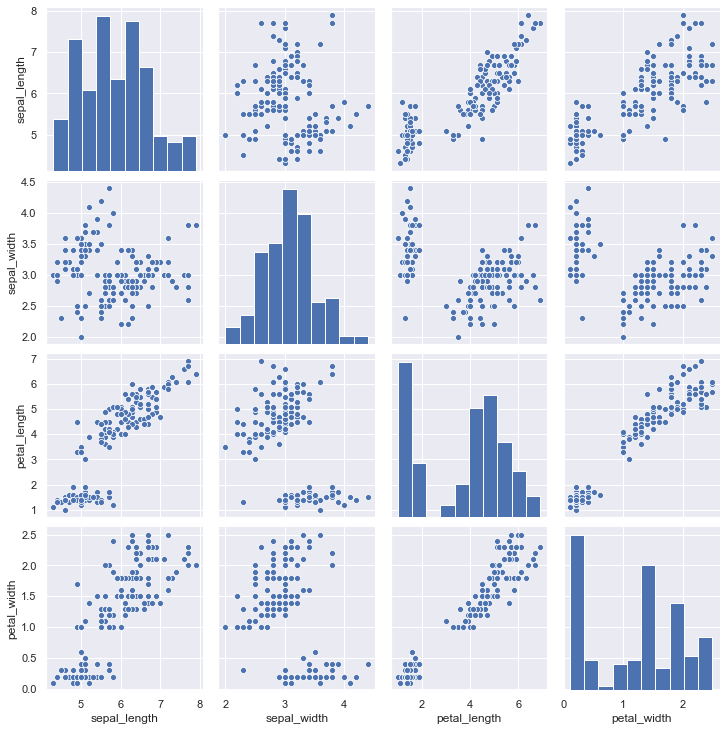

In [20]:
sns.pairplot(df_iris)

Essa função é baseada na classe do seaborn PairGrid, que configura o visual das múltiplas visualizações. Por esse motivo, não pode ser configurada com funções do matplotlib.pyplot.



Observe o resultado. Cada linha e cada coluna da matriz representa uma variável. Quando a variável da linha e da coluna são distintas, o elemento da matriz mostra um gráfico de dispersão das duas variáveis. Quando é a mesma, mostra o histograma da variável. Em uma mesma visualização, é possível analisar as relações entre as variáveis possíveis, além das distribuições univariadas. Como mostra muita informação em uma única imagem, ela não favorece a percepção de detalhes em particular, mas sim uma visão geral do conjunto de dados que pode ser aprofundada posteriormente. Conferindo rapidamente, pode-se notar, por exemplo, que existe uma forte correlação positiva entre o comprimento e a largura da pétala.

**Também é possível utilizar o parâmetro kind para alterar a visualização. Por exemplo, para criar uma reta de regressão, basta passar o valor ‘reg’ para o parâmetro kind, da mesma forma que foi feito com a função jointplot(). Confira:**

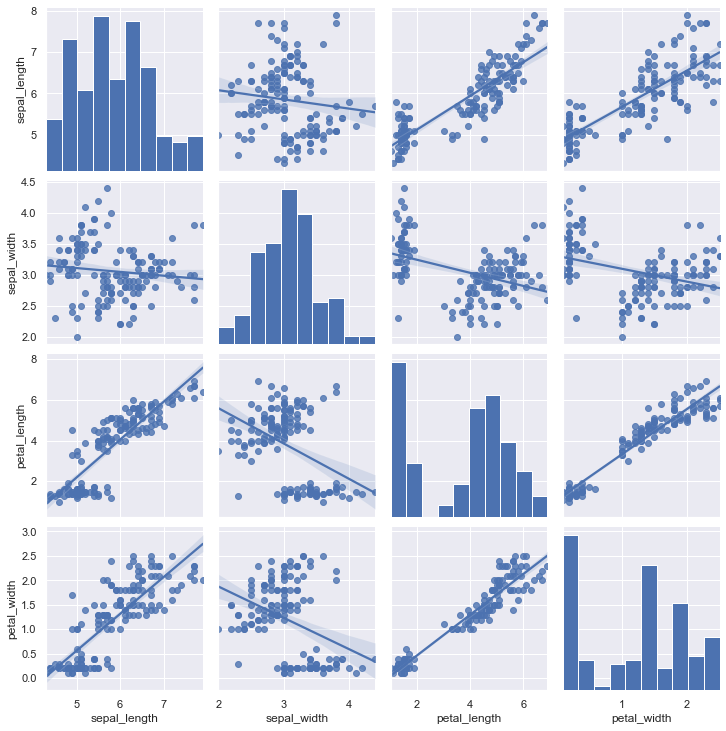

In [21]:
sns.pairplot(data=df_iris, kind='reg')

Essa visualização enfatiza as correlações existentes entre as diferentes variáveis. Ela é bastante útil para conhecer as variáveis quantitativas. Mas em relação a variáveis categóricas? No caso desse conjunto de dados em particular, o maior interesse é em como distinguir as três espécies de Íris a partir das medidas das pétalas e sépalas. Isso pode ser visto no gráfico seguinte.

**Para distinguir as três espécies, a função pairplot() consegue distinguir uma variável categórica em distribuições conjuntas, mapeando a categoria para uma cor. Para isso, basta passar a coluna com a variável categórica, nesse caso, basta passar a coluna ‘species’ para o parâmetro hue. Confira no exemplo a seguir:**

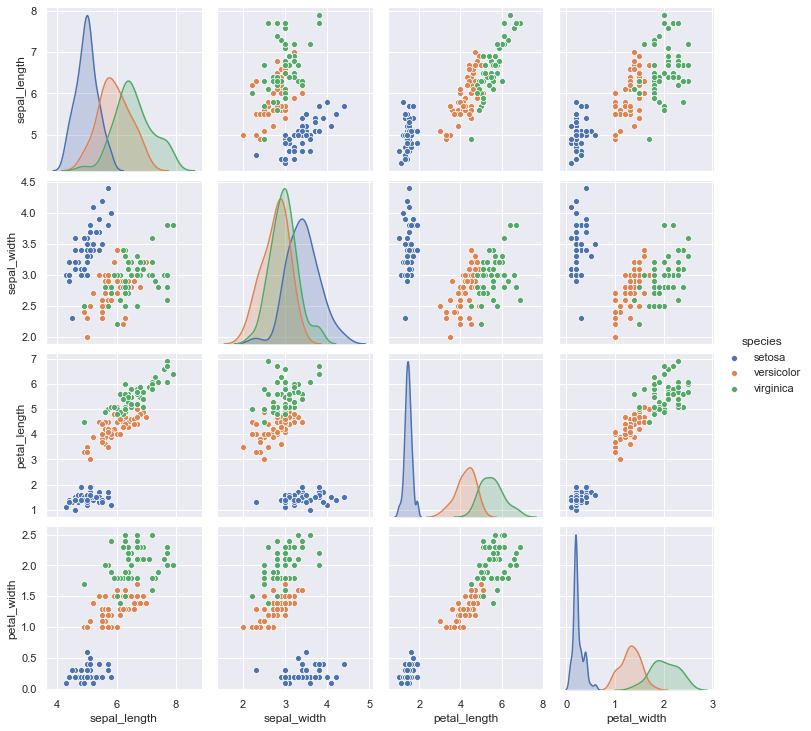

In [22]:
sns.pairplot(data=df_iris, hue='species')

Observe que nos gráficos de dispersão os pontos azuis são Iris da espécie setosa, os laranjas são da espécie versicolor e os verdes da espécie virginica. Além disso, na diagonal as distribuições univariadas são representadas por gráficos de densidade, onde é feita uma separação por espécie.

Note como a função pairplot() é prática: Através de uma única função, conseguimos uma visão geral de todas as variáveis do conjunto de dados! Para o objetivo de distinguir as espécies, pode-se notar, por exemplo, que o comprimento e largura da pétala são bastante informativos. Note que as distribuições tanto do comprimento como da largura são bastante separáveis entre as espécies, com poucas áreas de interseção. Além disso, na distribuição conjunta do comprimento e largura da pétala, nota-se que as espécies possuem uma separação razoável, onde as setosas possuem menores comprimentos e larguras, as versicolor possuem valores intermediários e as virginicas possuem valores maiores, com alguma interseção.

**Dicas**

Ao se explorar um conjunto de dados com múltiplas variáveis quantitativas, é uma boa prática começar a explorá-lo utilizando a função pairplot() e depois criar visualizações que aprofundem as relações mais interessantes. Além disso, essa função é muito flexível, assim como outras do seaborn, e pode ter o visual configurado de muitas formas através dos seus parâmetros. Para conhecer todas as possibilidades, consulte a documentação oficial da função neste link:
https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot.